AMUSE tutorial on particle sets
====================


AMUSE particle sets are a handy tool for storing data

In [34]:
#Load in the amuse units module
from amuse.units import units
from amuse.lab import Particles

In [35]:
# Declare a single particle
sun_and_earth = Particles(2)
sun = sun_and_earth[0]
sun.mass = 1 | units.MSun
sun.position = (0,0,0) | units.au
sun.velocity = (0,0,0) | units.kms
print("Sun=", sun)

Sun= Particle(2403862238486982302, set=<140220129674336>
    , mass=1.0 MSun
    , vx=0.0 kms
    , vy=0.0 kms
    , vz=0.0 kms
    , x=0.0 au
    , y=0.0 au
    , z=0.0 au)


In [36]:
# Now declare the Earth
from amuse.units.constants import G
earth = sun_and_earth[1]
earth.mass = 1 | units.MEarth
earth.position = (1, 0, 0) | units.au
def relative_orbital_velocity(mass, distance):
    return (G*mass/distance).sqrt()
vorb = relative_orbital_velocity(sun_and_earth.mass.sum(), 
                                earth.position.sum())
earth.velocity = (0, 1, 0) * vorb
print("Earth=", earth)

Earth= Particle(9167350538642143653, set=<140220129674336>
    , mass=3.00273515275e-06 MSun
    , vx=0.0 kms
    , vy=29.7885123292 kms
    , vz=0.0 kms
    , x=1.0 au
    , y=0.0 au
    , z=0.0 au)


In [37]:
sun_and_earth.move_to_center()
print(sun_and_earth)

                 key         mass           vx           vy           vz            x            y            z
                   -         MSun          kms          kms          kms           au           au           au
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 2403862238486982302    1.000e+00    0.000e+00   -8.945e-05    0.000e+00   -3.003e-06    0.000e+00    0.000e+00
 9167350538642143653    3.003e-06    0.000e+00    2.979e+01    0.000e+00    1.000e+00    0.000e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========


Now, let's give the particles a specific name (or other attribute)

In [38]:
setattr(sun_and_earth, "name", "")
sun_and_earth.name = ["sun", "earth"]

How we have declared the particles and moved them to the center of mass. We can also search for a specific particle. For example, the one with the "sun" in the attribute "name".

In [39]:
earth = sun_and_earth[sun_and_earth.name=="earth"]
print("Sun=", sun)

Sun= Particle(2403862238486982302, set=<140220129674336>
    , mass=1.0 MSun
    , name=sun
    , vx=0.0 kms
    , vy=-8.9446744534e-05 kms
    , vz=0.0 kms
    , x=-3.00272613635e-06 au
    , y=0.0 au
    , z=0.0 au)


We can add a moon in orbit around the earth

In [40]:
moon = Particles(1)
moon.name = "moon"
moon.mass = 7.34767309e+22 | units.kg
moon.position = (384400, 0, 0) | units.km
vorb = relative_orbital_velocity(earth.mass + moon.mass, 
                                 moon.position.sum())
moon.velocity = (0, 1, 0) * vorb
print("moon=", moon)

moon=                  key         mass         name           vx           vy           vz            x            y            z
                   -           kg         none  44597309335878.1 * m * s**-1  44597309335878.1 * m * s**-1  44597309335878.1 * m * s**-1           km           km           km
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 9318732944601272712    7.348e+22         moon    0.000e+00    2.297e-11    0.000e+00    3.844e+05    0.000e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========


The moon, however, is not somewhere inside the Sun with zero velocity which is not good. We will have to replace the moon to make it orbit around the Earth. We do that by simply adding the positions and velocity of Earth to the moon's.

In [41]:
moon.position += earth.position
moon.velocity += earth.velocity

And we can add the moon to the Sun and Earth system

In [42]:
sun_and_earth.add_particle(moon)

Note the use of the singular here, because we only add a single particle to the particle set sun_and_earth.
It is probably better to rename the sun_and_earth now.

In [43]:
solarsystem = sun_and_earth

It is important now to recenter the entire system, because by adding the moon we shifted the center of mass.

In [44]:
solarsystem.move_to_center()
print("Solar system:", solarsystem)

Solar system:                  key         mass         name           vx           vy           vz            x            y            z
                   -         MSun         none          kms          kms          kms           au           au           au
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 2403862238486982302    1.000e+00          sun    0.000e+00   -9.059e-05    0.000e+00   -3.040e-06    0.000e+00    0.000e+00
 9167350538642143653    3.003e-06        earth    0.000e+00    2.979e+01    0.000e+00    1.000e+00    0.000e+00    0.000e+00
 9318732944601272712    3.694e-08         moon    0.000e+00    3.081e+01    0.000e+00    1.003e+00    0.000e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========


We can now manipulate the planetary system, or query it.
for example by querying the masses.

In [45]:
print("mass=", solarsystem.mass.in_(units.MEarth))

mass= [333029.704297, 1.0, 0.0123031263019] MEarth


This gives us a list of the masses of all objects, in units the the earth's mass. In fact, each of the particle's attributes is a simple numpy array: it can be assigned and manipulated as such.

Another way to ecquire the same information could be done as follows:

In [46]:
print("mass=", solarsystem.mass/solarsystem[1].mass)

mass= [  3.33029704e+05   1.00000000e+00   1.23031263e-02]


In some (hopefully rare) cases you may want to use the particle set or its attributes as simple numpy arrays, without the units.
This is easily achieved by stripping the unit from the array. This can be realied by explicitely querying the selected parameter with that specific unit.

In [47]:
solarsystem.position.value_in(units.parsec)

array([[ -1.47371911e-11,   0.00000000e+00,   0.00000000e+00],
       [  4.84812207e-06,   0.00000000e+00,   0.00000000e+00],
       [  4.86057963e-06,   0.00000000e+00,   0.00000000e+00]])

which, in this case, gives you a 2-dimensional *numpy.array* of the positions of star, planet and moon in units of a parsec.

Now, you may want to query the particle set solarsystem.
for example by asking what are all its attributes.
this can be done as follows:

In [48]:
dir(solarsystem)

['GLOBAL_DERIVED_ATTRIBUTES',
 'LagrangianRadii',
 'Qparameter',
 '__add__',
 '__array__',
 '__array_interface__',
 '__array_struct__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_indices_in_attribute_storage',
 '_as_masked_subset_in',
 '_attributes_for_dir',
 '_convert_from_entities_or_quantities',
 '_convert_to_entities_or_quantities',
 '_convert_to_entities_or_quantities_async',
 '_convert_to_entity_or_quantity',
 '_factory_for_new_collection',
 '_get_derived_attribute_value',
 '_get_particle',
 '_get_particle_unsave',
 '_get_value_of_attribute',
 '_get_values_

Or get some general help on the underlying particle class

In [49]:
help(solarsystem)

Help on Particles in module amuse.datamodel.particles object:

class Particles(AbstractParticleSet)
 |  Particles(size=0, storage=None, keys=None, keys_generator=None, particles=None, is_working_copy=True, **attributes)
 |  
 |  A set of particles. Attributes and values are stored in
 |  a private storage model. This storage model can store
 |  the values in the python memory space, in the memory space
 |  of the code or in a HDF5 file. By default the storage
 |  model is in memory.
 |  
 |  Method resolution order:
 |      Particles
 |      AbstractParticleSet
 |      amuse.datamodel.base.AbstractSet
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |  
 |  __init__(self, size=0, storage=None, keys=None, keys_generator=None, particles=None, is_working_copy=True, **attributes)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  add_particles_to_store(self, keys, attributes=[], values=[])
 |  
 |

###### You have performed some rudimentary operations on a particle set.
It is now time to experiment a little for yourself.


Assignments and questions:
---------------

### Assignment 1:
Add the planet Jupiter (see [Wikipedia](https://en.wikipedia.org/wiki/Jupiter)) to your small planetary system.

In [50]:
jupiter = Particles(1)
jupiter.name = "jupiter"
jupiter.mass = 1.8982e+27 | units.kg
jupiter.position = (778.479e6, 0, 0) | units.km
vorb = relative_orbital_velocity(sun.mass + jupiter.mass, 
                                 jupiter.position.sum())
jupiter.velocity = (0, 1, 0) * vorb
print("jupiter=", jupiter)

jupiter=                  key         mass         name           vx           vy           vz            x            y            z
                   -           kg         none  44597309335878.1 * m * s**-1  44597309335878.1 * m * s**-1  44597309335878.1 * m * s**-1           km           km           km
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 4597496334504196547    1.898e+27      jupiter    0.000e+00    2.929e-10    0.000e+00    7.785e+08    0.000e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========


In [51]:
solarsystem.add_particle(jupiter)

solarsystem.move_to_center()
print("Solar system:", solarsystem)

Solar system:                  key         mass         name           vx           vy           vz            x            y            z
                   -         MSun         none          kms          kms          kms           au           au           au
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 2403862238486982302    1.000e+00          sun    0.000e+00   -1.255e-02    0.000e+00   -4.965e-03    0.000e+00    0.000e+00
 9167350538642143653    3.003e-06        earth    0.000e+00    2.978e+01    0.000e+00    9.950e-01    0.000e+00    0.000e+00
 9318732944601272712    3.694e-08         moon    0.000e+00    3.080e+01    0.000e+00    9.976e-01    0.000e+00    0.000e+00
 4597496334504196547    9.544e-04      jupiter    0.000e+00    1.305e+01    0.000e+00    5.199e+00    0.000e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========

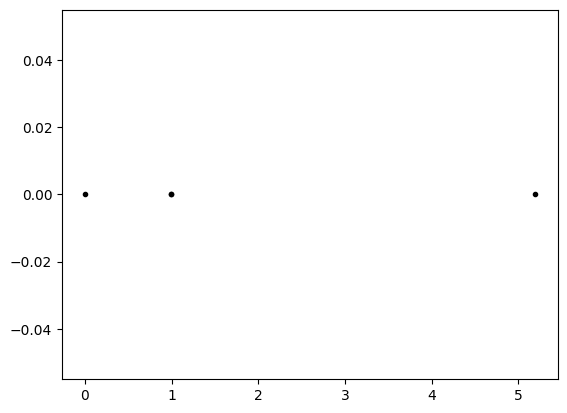

In [67]:
import matplotlib.pyplot as plt
from amuse.units.trigo import cos, sin, arccos, arctan2

def plot_solarsystem():
    plt.plot(solarsystem.x.number, solarsystem.y.number, 'k.')
    plt.show()
plot_solarsystem()

### Assignment 2:
Your planetary system is notoriously planar, and initialy the earth and moon are positioned along the Cartesian x-axis with the velocity vector in the Cartesian y-direction. 

Make the Sun-Earth-Moon system more realistic by introducing a small inclination to the Earth's and Moon's orbits and by giving them a random mean anomaly.

The [Orbital element module](https://github.com/amusecode/amuse/blob/main/src/amuse/ext/orbital_elements.py) of AMUSE could come in handy. 

In [77]:
solarsystem.add_particle(earth)

In [85]:
# inclination of Earth is 1.57869° to invariable plane; 0.00005° to J2000 ecliptic
# inclination of Moon is 5.145° to the ecliptic
ma = units.pi/5
print(ma)
print(cos(ma))
print(sin(ma))
solarsystem[-1].x = cos(ma)*units.AU
print(solarsystem[-1])
#plot_solarsystem()

0.6283185307179586
0.809016994375
0.587785252292


Exception: Cannot convert 'unit<0.809016994375 * AU>' to a vector quantity

### Assignment 3:
Calculate the total  gravitational binding energy of solarsystem.

Now displace the entire particle set by 100 parsec and give it a linear velocity of 100km/s in the z-direction.
Then calculate the binding energy of the system again.

Did the binding energy of the Solar system change by this translation?

### Question 1:
Particle sets have the attribute *get_binaries()*.
If you use this function to check the binaries in your system you will find that (without Jupiter) you have 3 binaries. Explain why the Sun is in a binary with the Moon. You may want to take a look at the [source code](https://github.com/amusecode/amuse/blob/main/src/amuse/datamodel/particle_attributes.py).

### Assignment 4:
Generate another particle set with a 2 solar-mass star and two planets of 10 and 100 Earth masses in cirular orbits at 0.1 and 0.6 au. Place this second planetary system at apocenter around your Solar system (true anomaly of 180 degrees) at a semimajor axis of 60 au with an eccentricity of 0.6.
Then move the entire system to the center of mass.

### Question 2:
Which of the orbits of the binary star with planets from *Assignment 4* has the highest binding energy?